In [116]:
from scipy.io.wavfile import read
import scipy.signal as signal
import matplotlib as mpl
from scipy.stats import skew, kurtosis
cmap = mpl.colormaps['Reds']


In [117]:

sampling_rate,data= read(r"C:\Users\Admin\Downloads\baby-crying-01.wav")

C:\Users\Admin\AppData\Local\Temp\ipykernel_14348\3213013389.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sampling_rate,data= read(r"C:\Users\Admin\Downloads\baby-crying-01.wav")


In [118]:
print(data.shape)

(816000, 2)


In [119]:
wav=data[:,1]

In [120]:
print(type(wav))

<class 'numpy.ndarray'>


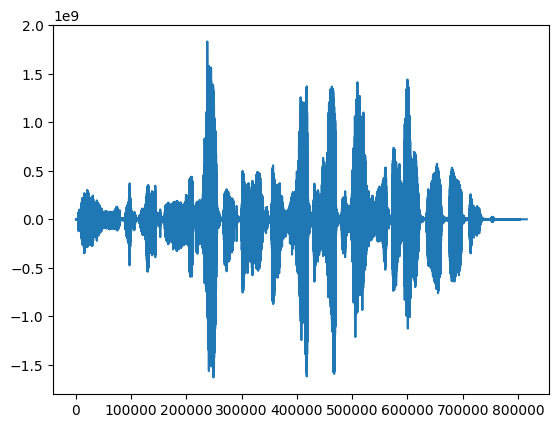

In [121]:
plt.plot(wav)
plt.show()

In [122]:
f, t, Zxx = signal.stft(wav, fs=sampling_rate)

In [123]:
print(f.shape)

(129,)


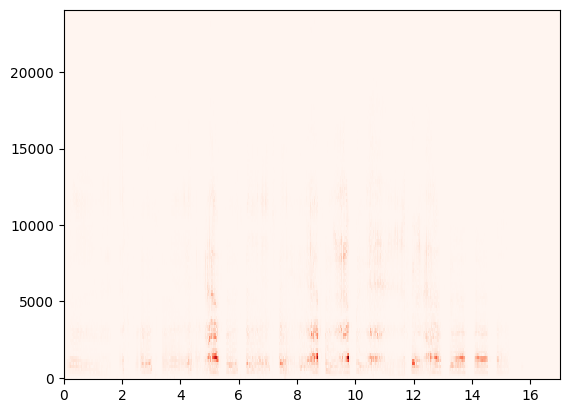

In [124]:
plt.pcolormesh(t, f, np.abs(Zxx), cmap=cmap)

In [276]:
import os
import numpy as np
from scipy.io import wavfile
from scipy.signal import spectrogram
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import skew, kurtosis

# Directory containing the infant cry and non-cry audio files
data_dir_cry = r"D:\infant cry detecting\dev\baby_cry\baby_cry_detection\data\301 - Crying baby"
data_dir_non_cry = r"D:\infant cry detecting\dev\baby_cry\baby_cry_detection\data\901 - Silence"

# Replace with the actual directory path

# Sample rate and other parameters
fs = 1000  # Sample rate (adjust as needed)
nperseg = 256  # Window size for STFT (adjust as needed)
noverlap = 128  # Overlap between windows (ensure it's less than nperseg/2)

# Initialize empty lists for features
features = []
labels = []

# List all files in the directory
audio_files_cry = os.listdir(data_dir_cry)
audio_files_non_cry = os.listdir(data_dir_non_cry)

# Loop through each audio file
for audio_file in audio_files_cry:
    # Check if the file is a WAV file
    if audio_file.endswith(".wav"):
        # Construct the full path to the audio file
        audio_path = os.path.join(data_dir_cry, audio_file)
        
        # Read the audio file
        fs, audio_signal = wavfile.read(audio_path)

        # Compute STFT
        f, t, Sxx = spectrogram(audio_signal, fs=fs, nperseg=nperseg, noverlap=noverlap)

        # Calculate the 20 features from STFT
        tf_mean = np.mean(Sxx)
        tf_std = np.std(Sxx)
        
        tma = np.max(Sxx, axis=0)
        tma_max = np.max(tma)
        tma_min = np.min(tma)
        tma_mean = np.mean(tma)
        tma_std = np.std(tma)
        tma_skewness = skew(tma)
        tma_kurt = kurtosis(tma)
        
        fma = np.max(Sxx, axis=1)
        fma_max = np.max(fma)
        fma_min = np.min(fma)
        fma_mean = np.mean(fma)
        fma_std = np.std(fma)
        fma_skewness = skew(fma)
        fma_kurt = kurtosis(fma)
        
        fsda = np.std(Sxx, axis=1)
        fsda_max = np.max(fsda)
        fsda_min = np.min(fsda)
        fsda_mean = np.mean(fsda)
        fsda_std = np.std(fsda)
        fsda_skewness = skew(fsda)
        fsda_kurt = kurtosis(fsda)

        # Determine if it's a cry or non-cry sound based on file name or other criteria
        # For example, you can use a naming convention or other metadata to label the data
        is_cry = 1 #if "cry" in audio_file else 0

        # Combine features into a feature vector
        feature_vector = np.array([is_cry, tf_mean, tf_std,
                                   tma_max, tma_min, tma_mean, tma_std, tma_skewness, tma_kurt,
                                   fma_max, fma_min, fma_mean, fma_std, fma_skewness, fma_kurt,
                                   fsda_max, fsda_min, fsda_mean, fsda_std, fsda_skewness, fsda_kurt])

        # Append feature vector and label to lists
        features.append(feature_vector)
        labels.append(is_cry)
        
        
# Loop through each audio file in the non-cry directory
for audio_file in audio_files_non_cry:
    # Check if the file is a WAV file
    if audio_file.endswith(".wav"):
        # Construct the full path to the audio file
        audio_path = os.path.join(data_dir_non_cry, audio_file)
        
        # Read the audio file
        fs, audio_signal = wavfile.read(audio_path)

        # Compute STFT
        f, t, Sxx = spectrogram(audio_signal, fs=fs, nperseg=nperseg, noverlap=noverlap)

        # Calculate the 20 features from STFT
        tf_mean = np.mean(Sxx)
        tf_std = np.std(Sxx)
        
        tma = np.max(Sxx, axis=0)
        tma_max = np.max(tma)
        tma_min = np.min(tma)
        tma_mean = np.mean(tma)
        tma_std = np.std(tma)
        tma_skewness = skew(tma)
        tma_kurt = kurtosis(tma)
        
        fma = np.max(Sxx, axis=1)
        fma_max = np.max(fma)
        fma_min = np.min(fma)
        fma_mean = np.mean(fma)
        fma_std = np.std(fma)
        fma_skewness = skew(fma)
        fma_kurt = kurtosis(fma)
        
        fsda = np.std(Sxx, axis=1)
        fsda_max = np.max(fsda)
        fsda_min = np.min(fsda)
        fsda_mean = np.mean(fsda)
        fsda_std = np.std(fsda)
        fsda_skewness = skew(fsda)
        fsda_kurt = kurtosis(fsda)

        # Label non-cry audio as 0
        is_cry = 0

        # Combine features into a feature vector
        feature_vector = np.array([is_cry, tf_mean, tf_std,
                                   tma_max, tma_min, tma_mean, tma_std, tma_skewness, tma_kurt,
                                   fma_max, fma_min, fma_mean, fma_std, fma_skewness, fma_kurt,
                                   fsda_max, fsda_min, fsda_mean, fsda_std, fsda_skewness, fsda_kurt])

        # Append feature vector and label to lists
        features.append(feature_vector)
        labels.append(is_cry)
        
# Create a DataFrame with meaningful column names
column_names = ['IsCry', 'TF_Mean', 'TF_Std', 'TMA_Max', 'TMA_Min', 'TMA_Mean', 'TMA_Std', 'TMA_Skewness', 'TMA_Kurtosis',
                'FMA_Max', 'FMA_Min', 'FMA_Mean', 'FMA_Std', 'FMA_Skewness', 'FMA_Kurtosis',
                'FSDA_Max', 'FSDA_Min', 'FSDA_Mean', 'FSDA_Std', 'FSDA_Skewness', 'FSDA_Kurtosis']

df = pd.DataFrame(features, columns=column_names)

# Shuffle the DataFrame
df = df.sample(frac=1, random_state=42).reset_index(drop=True)


# Split the data into training and testing sets (80% train, 20% test)
X = df.drop('IsCry', axis=1)
y = df['IsCry']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

# Save the trained model to a file
model_path = "cry_detection_model.pkl"
joblib.dump(clf, model_path)





Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        23
         1.0       1.00      1.00      1.00        13

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



['cry_detection_model.pkl']

In [277]:
import numpy as np
from scipy.io import wavfile
from scipy.signal import spectrogram
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import joblib

# Function to extract features from an audio file
def extract_features(audio_path):
    # Sample rate and other parameters (should match the training parameters)
    fs = 1000
    nperseg = 256
    noverlap = 128

    # Read the audio file
    fs, audio_signal = wavfile.read(audio_path)

    # Compute STFT
    f, t, Sxx = spectrogram(audio_signal, fs=fs, nperseg=nperseg, noverlap=noverlap)

    # Calculate the 20 features from STFT
    tf_mean = np.mean(Sxx)
    tf_std = np.std(Sxx)
    
    tma = np.max(Sxx, axis=0)
    tma_max = np.max(tma)
    tma_min = np.min(tma)
    tma_mean = np.mean(tma)
    tma_std = np.std(tma)
    tma_skewness = skew(tma)
    tma_kurt = kurtosis(tma)
        
    fma = np.max(Sxx, axis=1)
    fma_max = np.max(fma)
    fma_min = np.min(fma)
    fma_mean = np.mean(fma)
    fma_std = np.std(fma)
    fma_skewness = skew(fma)
    fma_kurt = kurtosis(fma)
        
    fsda = np.std(Sxx, axis=1)
    fsda_max = np.max(fsda)
    fsda_min = np.min(fsda)
    fsda_mean = np.mean(fsda)
    fsda_std = np.std(fsda)
    fsda_skewness = skew(fsda)
    fsda_kurt = kurtosis(fsda)

    # Determine if it's a cry or non-cry sound based on file name or other criteria
    # For example, you can use a naming convention or other metadata to label the data
    is_cry = 1 if "cry" in audio_file else 0

    # Combine features into a feature vector
    feature_vector = np.array([ tf_mean, tf_std,
                               tma_max, tma_min, tma_mean, tma_std, tma_skewness, tma_kurt,
                               fma_max, fma_min, fma_mean, fma_std, fma_skewness, fma_kurt, 
                               fsda_max, fsda_min, fsda_mean, fsda_std, fsda_skewness, fsda_kurt])

    # Append feature vector and label to lists
    features.append(feature_vector)
    labels.append(is_cry)
    return feature_vector



# Load the trained Random Forest Classifier model (replace with the actual model path)
#model_path = 

  # Replace with the actual model path
#clf = RandomForestClassifier(n_estimators=100, random_state=42)
#clf = joblib.load(model_path)
#clf = model
# Path to the new audio clip you want to classify
new_audio_path = r"D:\infant cry detecting\dev\baby_cry\baby_cry_detection\data\901 - Silence\silence.wav_6.wav"  # Replace with the actual path

# Extract features from the new audio clip
new_feature_vector = extract_features(new_audio_path)

# Make a prediction using the trained model
prediction = clf.predict([new_feature_vector])
print(prediction)
# Map prediction to class label (you can define a mapping if needed)
#class_label = "Cry Sound" if prediction == 1 else "Non-Cry Sound"

# Print the result
#print(f"The audio clip is classified as: {class_label}")
# Interpret the prediction
if prediction[0] == 1:
    print("The new audio clip contains a cry sound.")
else:
    print("The new audio clip does not contain a cry sound.")

[0.]
The new audio clip does not contain a cry sound.


C:\Users\Admin\anaconda3\envs\cry_det\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
